> **Import libraries**

In [1]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path
from PIL import Image

## less Important
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from functools import partial
import os
from scipy import stats
import missingno as msno
import joblib
import tarfile
import shutil
import urllib
from keras import models, layers
## Sklearn
from sklearn import datasets
## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
## Metrics
from sklearn.metrics import accuracy_score
import keras
## tensorflow & Keras
import tensorflow as tf    ## i will use tf for every thing and for keras using tf.keras

In [2]:

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
train_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/train.csv')
train_images = Path(r'../input/arabic-hwr-ai-pro-intake1/train')

## read these all training images paths as Series
train_images_paths = pd.Series(sorted(list(train_images.glob(r'*.png'))), name='Filepath').astype(str)

train_images_paths.head()

0    ../input/arabic-hwr-ai-pro-intake1/train/00000...
1    ../input/arabic-hwr-ai-pro-intake1/train/00001...
2    ../input/arabic-hwr-ai-pro-intake1/train/00002...
3    ../input/arabic-hwr-ai-pro-intake1/train/00003...
4    ../input/arabic-hwr-ai-pro-intake1/train/00004...
Name: Filepath, dtype: object

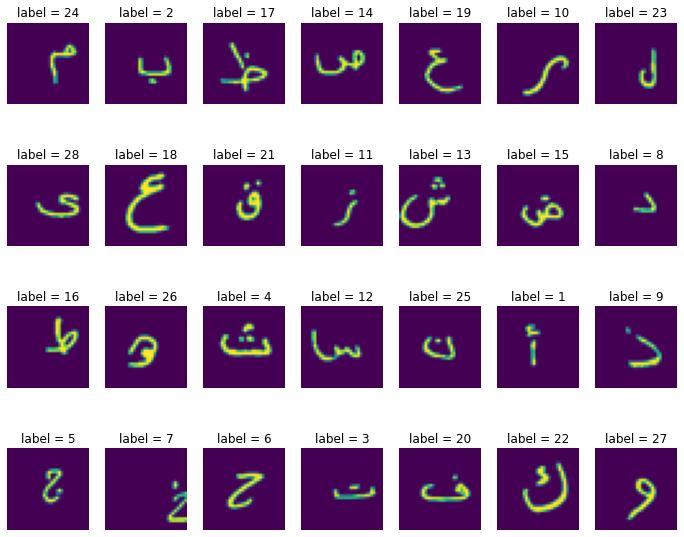

In [4]:
img_key_value = {}
for value in train_labels['label'].unique():
    img_key_value[value] = train_labels[train_labels['label']==value].index[0]
    
img_index = list(img_key_value.values())
img_label = list(img_key_value.keys())

fig, ax = plt.subplots(4, 7, figsize=(12, 10))

i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        plt.title(f'label = {img_label[i]}')
        img = plt.imread(train_images_paths.iloc[img_index[i]])
        plt.imshow(img)
        plt.axis('off')
        i+=1

In [5]:
print('#of Instances in train_set :', len(train_images_paths))
print('#of Instances in train_labels :', len(train_labels))

img = plt.imread(train_images_paths.iloc[img_index[0]])
print('shape of each Image is :', img.shape)

#of Instances in train_set : 13440
#of Instances in train_labels : 13440
shape of each Image is : (32, 32, 4)


In [6]:
train_full_labels = train_labels['label'].values
train_full_set = np.empty((13440, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(train_images_paths):
    img = plt.imread(path)
    img = img[:,:,:3]
    train_full_set[idx] = img
    
print('train_full_set.shape :', train_full_set.shape)
print('train_full_labels.shape :', train_full_labels.shape)

train_full_set.shape : (13440, 32, 32, 3)
train_full_labels.shape : (13440,)


In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(train_full_set, train_full_labels, 
                                                      test_size=0.2, shuffle=True, random_state=42)

# print('X_train.shape =>', X_train.shape)
# print('X_valid.shape =>', X_valid.shape)
# print('y_train.shape =>', y_train.shape)
# print('y_valid.shape =>', y_valid.shape)

In [8]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                 activation='relu',
                 input_shape=(32,32,3)))
model.add(Conv2D(128, (4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.55))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(29, activation='sigmoid'))

#sigmoid


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
#RMSProp
model.summary()


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 128)       65664     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               11076096  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                    epochs=22, batch_size=32)

2021-11-07 22:42:20.604787: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/22
336/336 [==============================] - 49s 144ms/step - loss: 2.7149 - accuracy: 0.1725 - val_loss: 1.5112 - val_accuracy: 0.4937
Epoch 2/22
336/336 [==============================] - 49s 145ms/step - loss: 1.4989 - accuracy: 0.4799 - val_loss: 0.8079 - val_accuracy: 0.7400
Epoch 3/22
336/336 [==============================] - 47s 141ms/step - loss: 0.9738 - accuracy: 0.6614 - val_loss: 0.5229 - val_accuracy: 0.8255
Epoch 4/22
336/336 [==============================] - 48s 144ms/step - loss: 0.7375 - accuracy: 0.7374 - val_loss: 0.4497 - val_accuracy: 0.8724
Epoch 5/22
336/336 [==============================] - 48s 142ms/step - loss: 0.5783 - accuracy: 0.8003 - val_loss: 0.3400 - val_accuracy: 0.8891
Epoch 6/22
336/336 [==============================] - 49s 144ms/step - loss: 0.4860 - accuracy: 0.8337 - val_loss: 0.3179 - val_accuracy: 0.8984
Epoch 7/22
336/336 [==============================] - 48s 143ms/step - loss: 0.4135 - accuracy: 0.8577 - val_loss: 0.2815 - val_ac

In [10]:
evaluation = model.evaluate( X_valid,  y_valid,)
print("Accuracy on the testing images is {}".format(evaluation[1]*100))

84/84 [==============================] - 3s 35ms/step - loss: 0.2230 - accuracy: 0.9401
Accuracy on the testing images is 94.01041865348816


In [11]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                    epochs=15, batch_size=32)

Epoch 1/15
336/336 [==============================] - 49s 146ms/step - loss: 0.1326 - accuracy: 0.9585 - val_loss: 0.2349 - val_accuracy: 0.9405
Epoch 2/15
336/336 [==============================] - 49s 145ms/step - loss: 0.1383 - accuracy: 0.9541 - val_loss: 0.2415 - val_accuracy: 0.9349
Epoch 3/15
336/336 [==============================] - 50s 150ms/step - loss: 0.1230 - accuracy: 0.9608 - val_loss: 0.2447 - val_accuracy: 0.9308
Epoch 4/15
336/336 [==============================] - 49s 145ms/step - loss: 0.1227 - accuracy: 0.9607 - val_loss: 0.2200 - val_accuracy: 0.9464
Epoch 5/15
336/336 [==============================] - 49s 147ms/step - loss: 0.1263 - accuracy: 0.9628 - val_loss: 0.2242 - val_accuracy: 0.9457
Epoch 6/15
336/336 [==============================] - 51s 151ms/step - loss: 0.1156 - accuracy: 0.9637 - val_loss: 0.2700 - val_accuracy: 0.9375
Epoch 7/15
336/336 [==============================] - 49s 147ms/step - loss: 0.0980 - accuracy: 0.9686 - val_loss: 0.2513 - val_ac

In [12]:
evaluation = model.evaluate( X_valid,  y_valid,)
print("Accuracy on the testing images is {}".format(evaluation[1]*100))

84/84 [==============================] - 4s 43ms/step - loss: 0.2379 - accuracy: 0.9449
Accuracy on the testing images is 94.4940447807312


In [13]:
"""history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), 
                    epochs=50, batch_size=32)"""

'history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), \n                    epochs=50, batch_size=32)'

In [14]:
# model.save('model.h5')
# print("model saved")

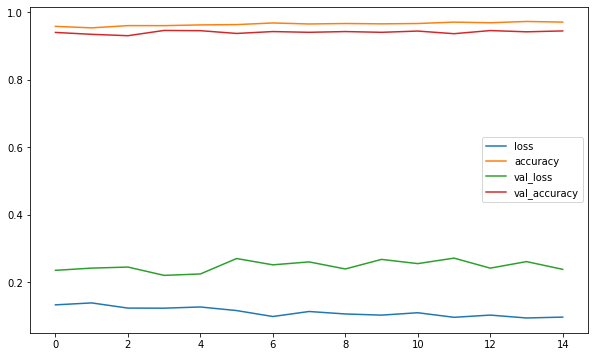

In [15]:
pd.DataFrame(history.history).plot(figsize=(10, 6));

In [16]:
loss_all_data, acc_all_data = model.evaluate(train_full_set, train_full_labels, verbose=0)
print('loss_all_data =>', loss_all_data)
print('acc_all_data =>', acc_all_data)

loss_all_data => 0.0496135875582695
acc_all_data => 0.9886160492897034


In [17]:
test_labels = pd.read_csv('../input/arabic-hwr-ai-pro-intake1/test.csv')
test_images = Path(r'../input/arabic-hwr-ai-pro-intake1/test')

## read these all training images paths as Series
test_images_paths = pd.Series(sorted(list(test_images.glob(r'*.png'))), name='Filepath').astype(str)

test_images_paths.head()

0    ../input/arabic-hwr-ai-pro-intake1/test/00000.png
1    ../input/arabic-hwr-ai-pro-intake1/test/00001.png
2    ../input/arabic-hwr-ai-pro-intake1/test/00002.png
3    ../input/arabic-hwr-ai-pro-intake1/test/00003.png
4    ../input/arabic-hwr-ai-pro-intake1/test/00004.png
Name: Filepath, dtype: object

In [18]:
len(test_images_paths)

3360

In [19]:
test_full_set = np.empty((3360, 32, 32, 3), dtype=np.float32)  #take only the first 3 channels

for idx, path in enumerate(test_images_paths):
    img = plt.imread(path)
    img = img[:,:,:3]
    test_full_set[idx] = img
    
print('test_full_set.shape =>', test_full_set.shape)

test_full_set.shape => (3360, 32, 32, 3)


In [20]:
y_preds_classes = np.argmax(model.predict(test_full_set), axis=-1)
test_labels['label'] = y_preds_classes

In [21]:
test_labels

,id,label
0,0,26
1,1,10
2,2,1
3,3,10
4,4,15
...,...,...
3355,3355,16
3356,3356,5
3357,3357,4
3358,3358,11


In [22]:
test_labels[['id', 'label']].to_csv('submission94.16.csv', index=False)